In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [6]:
df.shape

(13564, 17)

In [8]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['services' 'retired' 'self-employed' 'blue-collar' 'management'
 'technician' 'admin.' 'unemployed' 'housemaid' 'entrepreneur' 'student'
 'unknown']
marital
['married' 'divorced' 'single']
education
['secondary' 'primary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['cellular' 'telephone' 'unknown']
month
['may' 'jul' 'jun' 'mar' 'feb' 'sep' 'aug' 'dec' 'jan' 'apr' 'nov' 'oct']
poutcome
['unknown' 'failure' 'other' 'success']


In [10]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(),4), '%missing values')
else:
    print("No missing values found")

No missing values found


In [12]:
for column in df.columns:
    print(column,df[column].nunique())

ID 13564
age 75
job 12
marital 3
education 4
default 2
balance 4292
housing 2
loan 2
contact 3
day 31
month 12
duration 1201
campaign 40
pdays 422
previous 33
poutcome 4


In [13]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='0') & (feature not in 'deposit'))]
categorical_features

[]

In [15]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature, len(df[feature].unique())))


In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,80),facecolor = 'white')
plotnumber = 1 
for categorical_feature in categorical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()


<Figure size 1080x5760 with 0 Axes>

In [19]:
for categorical_feature in categorical_features:
    sns.catplot(x='deposit',col=categorical_feature,kind='count',data=df)
plt.show()

In [20]:
for categorical_feature in categorical_features:
    print(df.groupby(['deposit',categorical_feature]).size())

In [26]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

discrete_feature = [feature for feature in numerical_features if len(df[feature].unique()) < 25]
print("Discrete variables count: {}".format(len(discrete_feature)))


Discrete variables count: 0


In [29]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature count {}".format(len(continuous_features)))

Continuous feature count 8


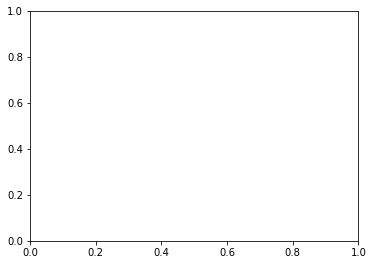

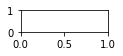

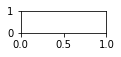

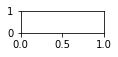

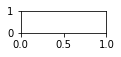

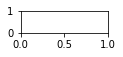

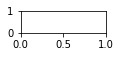

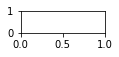

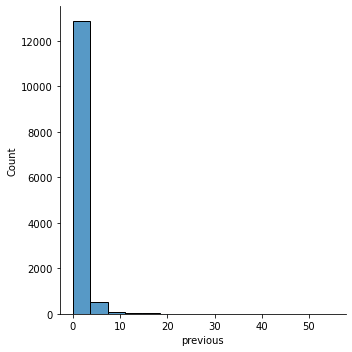

In [30]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for continuous_feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.displot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

ValueError: Could not interpret input 'deposit'

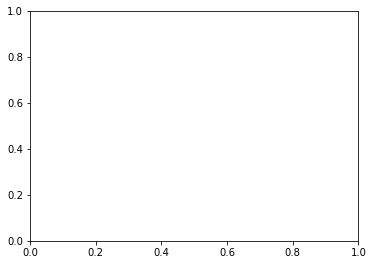

In [33]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit",y=df[feature],data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()


C:\Users\Yashika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Yashika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Yashika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Yashika\anaconda

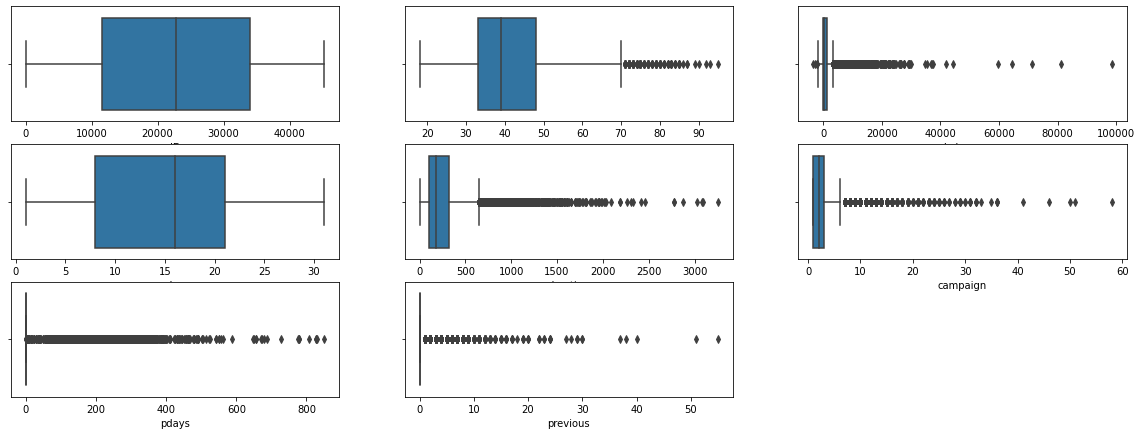

In [35]:
plt.figure(figsize=(20,30),facecolor= 'white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<AxesSubplot:>

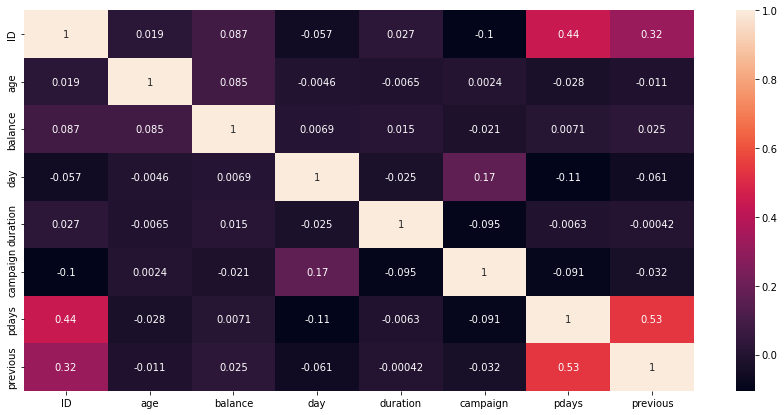

In [36]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [37]:
sns.countplot(x='desposit',data=df)
plt.show()

ValueError: Could not interpret input 'desposit'

In [38]:
df['deposit'].groupby(df['deposit'].count)

KeyError: 'deposit'

In [39]:
df2 = df.copy()

In [40]:
df2.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [41]:
df2.shape

(13564, 17)

In [50]:
if 'deposit' in df2.columns:
    print("The 'deposit' column exists in the DataFrame.")
else:
    print("The 'deposit' column does not exist in the DataFrame.")


The 'deposit' column does not exist in the DataFrame.


In [43]:
df2.drop(['default'],axis=1,inplace=True)

In [45]:
df2.groupby(['deposit','pdays']).size()

KeyError: 'deposit'

In [46]:
df2.drop(['pdays'],axis=1,inplace=True)

In [47]:
df2.groupby('age',sort=True)['age'].count()

age
18     4
19    13
20    11
21    31
22    43
      ..
89     1
90     1
92     1
93     1
95     1
Name: age, Length: 75, dtype: int64

In [48]:
df2.groupby(['deposit','balance'],sort=True)['balance'].count()

KeyError: 'deposit'

In [49]:
df2.groupby(['deposit','duration'],sort=True)['duration'].count()

KeyError: 'deposit'

In [51]:
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

KeyError: 'deposit'

In [52]:
df3 = df2[df2['campaign'] < 33]

In [54]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

KeyError: 'deposit'